In [1]:
import pandas as pd

In [2]:
score = pd.read_csv("class_scores.csv")
score.head(2)

Stu_ID  grade class gender  Math  English  Science  Marketing  Writing
0   10101      1     A      M    55       84       50         40       59
1   10102      1     A      M    29       94       41         87       57

In [7]:
score["new_col"] = score.loc[:, "Math":"Writing"].apply(lambda x: x.mean() - 200,
                                                        axis = 1)
score.head(2)

Stu_ID  grade class gender  Math  English  Science  Marketing  Writing  \
0   10101      1     A      M    55       84       50         40       59   
1   10102      1     A      M    29       94       41         87       57   

   new_col  
0   -142.4  
1   -138.4

In [15]:
dia = pd.read_csv("diamonds.csv")
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [ ]:
pd.crosstab(index = dia["cut"], columns = dia["color"], values = dia["price"],
            aggfunc = "mean").round(2)

In [19]:
pd.pivot_table(data = dia,
               values = "price", index = "cut", columns = "color").round(2)

color            D        E        F        G        H        I        J
cut                                                                     
Fair       4291.06  3682.31  3827.00  4239.25  5135.68  4685.45  4975.66
Good       3405.38  3423.64  3495.75  4123.48  4276.25  5078.53  4574.17
Ideal      2629.09  2597.55  3374.94  3720.71  3889.33  4451.97  4918.19
Premium    3631.29  3538.91  4324.89  4500.74  5216.71  5946.18  6294.59
Very Good  3470.47  3214.65  3778.82  3872.75  4535.39  5255.88  5103.51

In [22]:
# ~ 은 논리값(True, False) 반전
dia_sub = dia.loc[~((dia["cut"] == "Fair") & (dia["color"] == "F")), ]
len(dia_sub)

53628

In [23]:
pd.pivot_table(data = dia_sub,
               values = "price", index = "cut", columns = "color").round(2)

color            D        E        F        G        H        I        J
cut                                                                     
Fair       4291.06  3682.31      NaN  4239.25  5135.68  4685.45  4975.66
Good       3405.38  3423.64  3495.75  4123.48  4276.25  5078.53  4574.17
Ideal      2629.09  2597.55  3374.94  3720.71  3889.33  4451.97  4918.19
Premium    3631.29  3538.91  4324.89  4500.74  5216.71  5946.18  6294.59
Very Good  3470.47  3214.65  3778.82  3872.75  4535.39  5255.88  5103.51

In [24]:
pd.pivot_table(data = dia_sub,
               values = "price", index = "cut", columns = "color",
               fill_value = 0).round(2)

color            D        E        F        G        H        I        J
cut                                                                     
Fair       4291.06  3682.31     0.00  4239.25  5135.68  4685.45  4975.66
Good       3405.38  3423.64  3495.75  4123.48  4276.25  5078.53  4574.17
Ideal      2629.09  2597.55  3374.94  3720.71  3889.33  4451.97  4918.19
Premium    3631.29  3538.91  4324.89  4500.74  5216.71  5946.18  6294.59
Very Good  3470.47  3214.65  3778.82  3872.75  4535.39  5255.88  5103.51

In [25]:
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [26]:
dia[["cut", "color"]].drop_duplicates()

cut color
0        Ideal     E
1      Premium     E
2         Good     E
3      Premium     I
4         Good     J
5    Very Good     J
6    Very Good     I
7    Very Good     H
8         Fair     E
11       Ideal     J
12     Premium     F
16       Ideal     I
20        Good     I
21   Very Good     E
25   Very Good     G
28   Very Good     D
29   Very Good     F
35        Good     F
37        Good     H
42        Good     D
51       Ideal     G
54     Premium     D
56     Premium     J
62       Ideal     D
68     Premium     G
72     Premium     H
97        Fair     F
108      Ideal     F
128       Fair     H
130      Ideal     H
184       Good     G
227       Fair     G
255       Fair     J
352       Fair     I
676       Fair     D

In [ ]:
# pd.pivot()

In [27]:
from scipy.stats import ttest_1samp

In [28]:
df = pd.read_csv("iris_xlsx.csv")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [29]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 4)
print(stat)
print(p)

27.263680640799215
8.764592435410748e-60


In [30]:
df["Sepal.Length"].mean()

5.843333333333335

In [37]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 5.73) # 5.84 까지 조금씩 올려보세요~
print(round(stat, 2))
print(round(p, 3))

1.68
0.096


In [38]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [39]:
bike = pd.read_csv("bike.csv")

In [43]:
aov1 = ols("casual ~ season", data = bike).fit()
anova_lm(aov1)

df        sum_sq        mean_sq           F        PR(>F)
season        1.0  2.543642e+05  254364.153634  102.860335  4.600135e-24
Residual  10884.0  2.691513e+07    2472.908085         NaN           NaN

In [46]:
aov2 = ols("casual ~ C(season)", data = bike).fit()
anova_lm(aov2)

df        sum_sq        mean_sq           F         PR(>F)
C(season)      3.0  2.357570e+06  785856.669382  344.660562  7.937799e-214
Residual   10882.0  2.481193e+07    2280.088747         NaN            NaN

In [47]:
dia.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [48]:
# from statsmodels.stats.multicomp import tukeyhsd # XXXXXX
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [50]:
posthoc = pairwise_tukeyhsd(dia["price"], dia["cut"])
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4567 -119.3299   True
   Fair     Ideal -901.2158  0.001 -1180.5785 -621.8531   True
   Fair   Premium  225.4999  0.195   -59.2739  510.2738  False
   Fair Very Good -376.9979 0.0031  -663.8694  -90.1263   True
   Good     Ideal -471.3225  0.001   -642.367 -300.2779   True
   Good   Premium  655.3933  0.001   475.6466  835.1399   True
   Good Very Good   52.8954    0.9  -130.1565  235.9474  False
  Ideal   Premium 1126.7157  0.001  1008.8058 1244.6257   True
  Ideal Very Good  524.2179  0.001   401.3281  647.1078   True
Premium Very Good -602.4978  0.001  -737.2366 -467.7591   True
--------------------------------------------------------------


In [51]:
from scipy.stats import bartlett

In [53]:
stat, p = bartlett(dia.loc[dia["cut"] == "Good", "price"],
                   dia.loc[dia["cut"] == "Ideal", "price"],
                   dia.loc[dia["cut"] == "Premium", "price"]) 
print(stat)
print(p)

368.0903292307125
1.175440327456315e-80


In [56]:
dia.groupby("cut")["price"].std().reset_index()

cut        price
0       Fair  3560.386612
1       Good  3681.589584
2      Ideal  3808.401172
3    Premium  4349.204961
4  Very Good  3935.862161

In [58]:
aov3 = ols("price ~ C(cut) + C(clarity) + C(cut):C(clarity)", data = dia).fit()
anova_lm(aov3)

df        sum_sq       mean_sq           F  \
C(cut)                 4.0  1.104175e+10  2.760436e+09  180.157428   
C(clarity)             7.0  1.890981e+10  2.701402e+09  176.304579   
C(cut):C(clarity)     28.0  2.646561e+09  9.452003e+07    6.168766   
Residual           53900.0  8.258750e+11  1.532236e+07         NaN   

                          PR(>F)  
C(cut)             1.277078e-153  
C(clarity)         2.918210e-259  
C(cut):C(clarity)   9.645200e-23  
Residual                     NaN

In [59]:
aov3 = ols("price ~ C(cut) * C(clarity)", data = dia).fit()
anova_lm(aov3)

df        sum_sq       mean_sq           F  \
C(cut)                 4.0  1.104175e+10  2.760436e+09  180.157428   
C(clarity)             7.0  1.890981e+10  2.701402e+09  176.304579   
C(cut):C(clarity)     28.0  2.646561e+09  9.452003e+07    6.168766   
Residual           53900.0  8.258750e+11  1.532236e+07         NaN   

                          PR(>F)  
C(cut)             1.277078e-153  
C(clarity)         2.918210e-259  
C(cut):C(clarity)   9.645200e-23  
Residual                     NaN

In [ ]:
bike = pd.read_csv("bike_rental.csv")
bike.head(2)

In [63]:
bike["count_MA_5H"] = bike["count"].rolling(window = 5).mean()
bike.head(8)

datetime  casual  registered  count  count_MA_5H
0  2011-01-01 00:00:00       3          13     16          NaN
1  2011-01-01 01:00:00       8          32     40          NaN
2  2011-01-01 02:00:00       5          27     32          NaN
3  2011-01-01 03:00:00       3          10     13          NaN
4  2011-01-01 04:00:00       0           1      1         20.4
5  2011-01-01 05:00:00       0           1      1         17.4
6  2011-01-01 06:00:00       2           0      2          9.8
7  2011-01-01 07:00:00       1           2      3          4.0

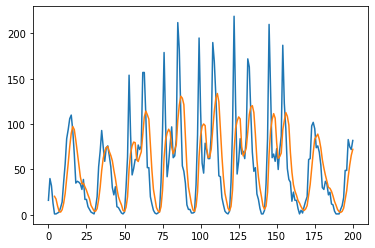

In [66]:
bike.loc[:200, "count"].plot()
bike.loc[:200, "count_MA_5H"].plot()